### Importing Libraries

In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Reading and Understanding Data

In [185]:
#Read the data from csv file
df = pd.read_csv('day.csv')

In [186]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [187]:
#checking the shape of dataframe
df.shape

(730, 16)

In [188]:
#describing the columns of dataframe
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [189]:
#get the info about columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [190]:
#describes the total size of the dataset
df.size

11680

### Data Cleaning

In [191]:
#checking for the null values in column data
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [192]:
#Dropping instant column as it is merely a index column which has no significance for our target
#Dropping dteday is not useful as month and weekday are covering it
#Removing casual and registered as cnt is sum of these

df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [193]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [194]:
#Encoding/mapping the season column
df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [195]:
#Encoding/mapping the month column
df.mnth = df.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [196]:
#Encoding/mapping the weekday column
df.weekday = df.weekday.map({1: 'wed', 2: 'thu', 3: 'fri', 4: 'sat', 5: 'sun', 6: 'mon', 0: 'tue'})

In [197]:
#Encoding/mapping the weathersit column
df.weathersit = df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [198]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### Exploratory Data Analysis

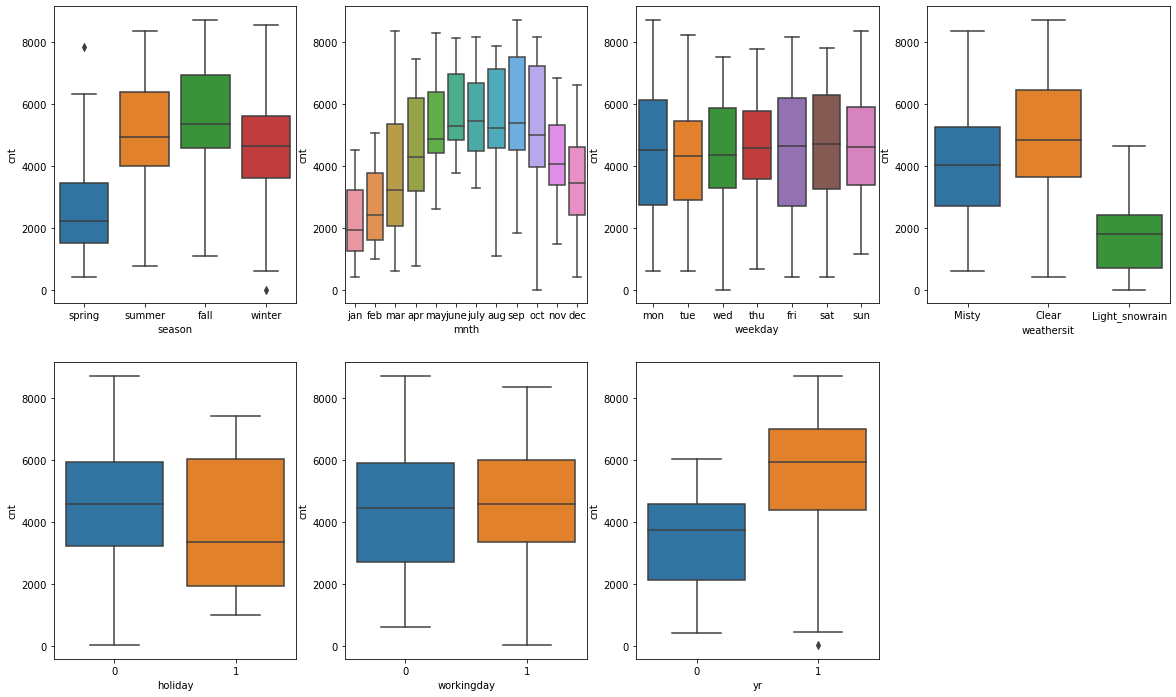

In [199]:
#Analysing/visualizing the categorical columns
#to see how predictor variable stands against the target variable

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(2,4,7)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.show()

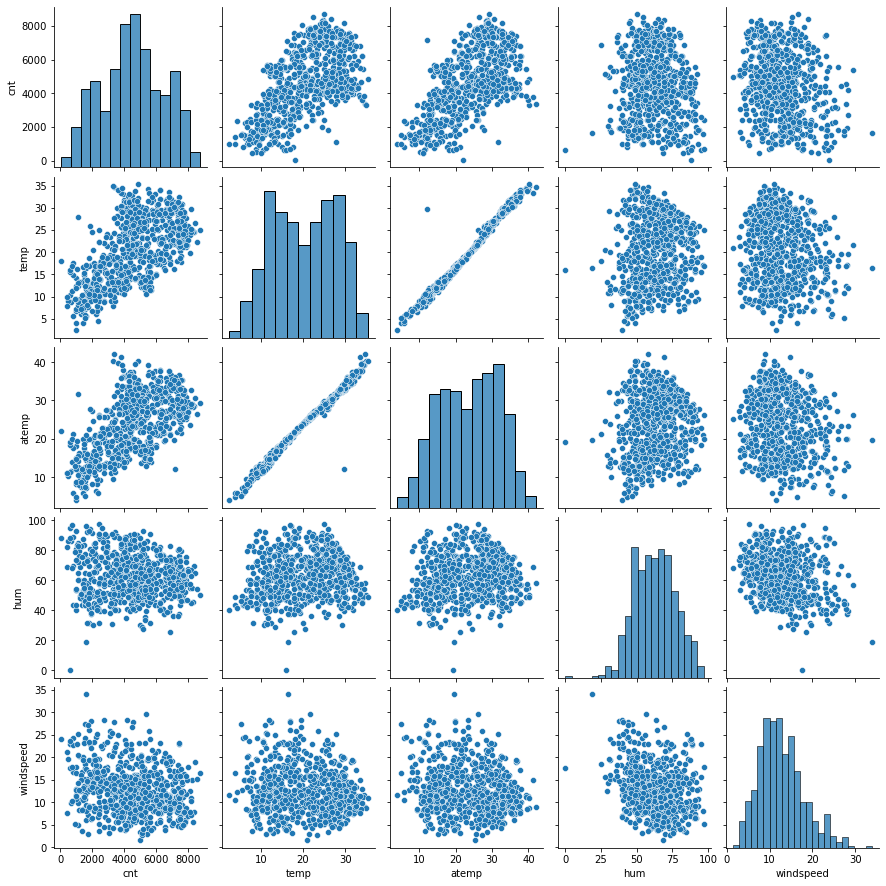

In [200]:
#Drawing pairplots to check for linear relationship
sns.pairplot(data=df,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

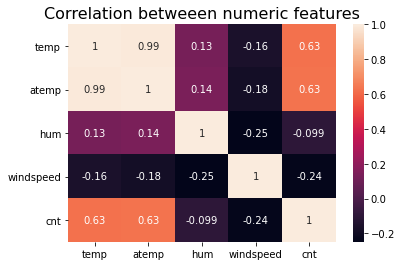

In [201]:
#Heatmap for correlation between numeric variables
num_features = ["temp","atemp","hum","windspeed","cnt"]
plt.title("Correlation betweeen numeric features",fontsize=16)
sns.heatmap(df[num_features].corr(),annot= True)
plt.show()

### Data Preparation

In [202]:
#Dummy variable creation for month, weekday, weathersit and season variables
df = pd.get_dummies(data=df,columns=["mnth","weekday","weathersit","season"],drop_first=True,dtype=int)

In [203]:
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_july',
       'mnth_june', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_Light_snowrain',
       'weathersit_Misty', 'season_spring', 'season_summer', 'season_winter'],
      dtype='object')

In [204]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_aug,mnth_dec,...,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty,season_spring,season_summer,season_winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,1,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,1,0,0


### Splitting data into train and test data

In [205]:
#y to contain only target variable
y=df.pop('cnt')

#X is all remainign variable also our independent variables
X=df

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [206]:
X.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,mnth_aug,mnth_dec,mnth_feb,...,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty,season_spring,season_summer,season_winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,0,0,0,...,0,0,0,1,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [207]:
#Checking shape and size for train and test
print(X_train.shape)
print(X_test.shape)

(511, 29)
(219, 29)


In [208]:
#Scaling continuous variables
num_vars = ['temp','atemp','hum','windspeed']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [209]:
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,mnth_aug,mnth_dec,mnth_feb,...,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty,season_spring,season_summer,season_winter
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.520548,0.027397,0.669276,0.550874,0.526518,0.654174,0.414873,0.074364,0.074364,0.074364,...,0.146771,0.129159,0.131115,0.152642,0.148728,0.029354,0.346380,0.230920,0.258317,0.250489
std,0.500067,0.163398,0.470935,0.227231,0.212976,0.143648,0.185619,0.262619,0.262619,0.262619,...,0.354224,0.335704,0.337857,0.359994,0.356169,0.168963,0.476282,0.421834,0.438138,0.433719
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354221,0.353207,0.544598,0.281934,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575304,0.563297,0.659940,0.384732,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745079,0.698389,0.756977,0.526481,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [210]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,mnth_aug,mnth_dec,mnth_feb,...,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty,season_spring,season_summer,season_winter
683,1,0,1,0.327133,0.322150,0.639330,0.327101,0,0,0,...,1,0,0,0,0,0,1,0,0,1
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0,0,0,...,0,0,0,0,1,0,1,0,0,1
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0,0,0,...,0,0,0,0,1,0,0,0,1,0
360,0,0,1,0.331287,0.326273,0.785745,0.415925,0,1,0,...,0,0,1,0,0,0,1,1,0,0
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0,0,0,...,0,0,0,0,0,0,1,0,0,1


### Recursive feature elimination

In [211]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [212]:
#List of variables selected in top 15 list
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', False, 3),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('mnth_aug', False, 8),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 12),
 ('mnth_jan', False, 15),
 ('mnth_july', True, 1),
 ('mnth_june', False, 14),
 ('mnth_mar', False, 4),
 ('mnth_may', False, 5),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 6),
 ('mnth_sep', False, 2),
 ('weekday_mon', True, 1),
 ('weekday_sat', False, 13),
 ('weekday_sun', False, 11),
 ('weekday_thu', False, 7),
 ('weekday_tue', True, 1),
 ('weekday_wed', False, 9),
 ('weathersit_Light_snowrain', True, 1),
 ('weathersit_Misty', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 10),
 ('season_winter', True, 1)]

In [213]:
#Generic function to calculate VIF of variables
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [214]:
#Dataframe with RFE selected variables
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]

In [215]:
#Calculate VIF
calculateVIF(X_train_rfe)

,Features,VIF
2,workingday,50.93
10,weekday_tue,12.41
9,weekday_mon,12.03
3,atemp,3.54
1,holiday,3.05
13,season_spring,2.87
14,season_winter,2.18
4,hum,1.86
8,mnth_nov,1.71
12,weathersit_Misty,1.57


### Building Linear Model

#### Model 1

In [216]:
#Building 1st linear regression model

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     183.4
Date:                Mon, 24 Jun 2024   Prob (F-statistic):          9.63e-186
Time:                        23:17:08   Log-Likelihood:                -4127.5
No. Observations:                 511   AIC:                             8285.
Df Residuals:                     496   BIC:                             8348.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [217]:
#As workingday shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['workingday'], axis = 1)

#Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,hum,25.11
2,atemp,17.25
4,windspeed,5.06
13,season_winter,2.71
12,season_spring,2.62
11,weathersit_Misty,2.25
0,yr,2.09
7,mnth_nov,1.81
6,mnth_july,1.43
5,mnth_dec,1.35


#### Model 2

In [218]:
#Building 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     183.4
Date:                Mon, 24 Jun 2024   Prob (F-statistic):          9.63e-186
Time:                        23:17:08   Log-Likelihood:                -4127.5
No. Observations:                 511   AIC:                             8285.
Df Residuals:                     496   BIC:                             8348.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [219]:
#We can drop weekday_mon variable as it has high p-value
X_train_new = X_train_new.drop(['weekday_mon'], axis = 1)

#Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,hum,24.94
2,atemp,17.24
4,windspeed,5.00
12,season_winter,2.71
11,season_spring,2.62
10,weathersit_Misty,2.25
0,yr,2.09
7,mnth_nov,1.81
6,mnth_july,1.43
5,mnth_dec,1.35


#### Model 3

In [220]:
#Building 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.8
Date:                Mon, 24 Jun 2024   Prob (F-statistic):          7.42e-187
Time:                        23:17:08   Log-Likelihood:                -4127.6
No. Observations:                 511   AIC:                             8283.
Df Residuals:                     497   BIC:                             8342.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [221]:
#We can drop hum variable as it has high VIF value
X_train_new = X_train_new.drop(['hum'], axis = 1)

#Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,atemp,4.95
3,windspeed,4.95
11,season_winter,2.38
0,yr,2.09
6,mnth_nov,1.77
10,season_spring,1.73
9,weathersit_Misty,1.56
5,mnth_july,1.37
4,mnth_dec,1.31
7,weekday_tue,1.19


#### Model 4

In [222]:
#Building 4th linear regression model

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     207.4
Date:                Mon, 24 Jun 2024   Prob (F-statistic):          6.68e-185
Time:                        23:17:08   Log-Likelihood:                -4135.0
No. Observations:                 511   AIC:                             8296.
Df Residuals:                     498   BIC:                             8351.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [223]:
#We can drop holiday variable as it has high p-value
X_train_new = X_train_new.drop(['holiday'], axis = 1)

#Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,windspeed,4.95
1,atemp,4.94
10,season_winter,2.38
0,yr,2.09
5,mnth_nov,1.77
9,season_spring,1.71
8,weathersit_Misty,1.56
4,mnth_july,1.37
3,mnth_dec,1.31
6,weekday_tue,1.19


#### Model 5

In [224]:
#Building 5th linear regression model

X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     221.5
Date:                Mon, 24 Jun 2024   Prob (F-statistic):          5.26e-184
Time:                        23:17:08   Log-Likelihood:                -4139.9
No. Observations:                 511   AIC:                             8304.
Df Residuals:                     499   BIC:                             8355.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [225]:
#We can drop weekday_tue variable as it has high p-value
X_train_new = X_train_new.drop(['weekday_tue'], axis = 1)

#Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
1,atemp,4.93
2,windspeed,4.91
9,season_winter,2.37
0,yr,2.08
5,mnth_nov,1.77
8,season_spring,1.69
7,weathersit_Misty,1.56
4,mnth_july,1.37
3,mnth_dec,1.31
6,weathersit_Light_snowrain,1.10


#### Model 6

In [226]:
# Building 6th linear regression model

X_train_lm_6 = sm.add_constant(X_train_new)
lr_6 = sm.OLS(y_train,X_train_lm_6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     238.0
Date:                Mon, 24 Jun 2024   Prob (F-statistic):          6.35e-183
Time:                        23:17:08   Log-Likelihood:                -4145.3
No. Observations:                 511   AIC:                             8313.
Df Residuals:                     500   BIC:                             8359.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [227]:
# Checking the parameters and their coefficient values
lr_6.params

const                        2422.114872
yr                           2013.970268
atemp                        3762.580734
windspeed                    -738.460089
mnth_dec                     -650.153169
mnth_july                    -546.428679
mnth_nov                     -749.825210
weathersit_Light_snowrain   -2140.862115
weathersit_Misty             -671.227429
season_spring               -1308.168855
season_winter                 689.717934
dtype: float64

### Residual Analysis

In [228]:
X_train_lm_6

,const,yr,atemp,windspeed,mnth_dec,mnth_july,mnth_nov,weathersit_Light_snowrain,weathersit_Misty,season_spring,season_winter
683,1.0,1,0.322150,0.327101,0,0,1,0,1,0,1
645,1.0,1,0.404998,0.419004,0,0,0,0,1,0,1
163,1.0,0,0.685963,0.708724,0,0,0,0,0,0,0
360,1.0,0,0.326273,0.415925,1,0,0,0,1,1,0
640,1.0,1,0.682653,0.110593,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
71,1.0,0,0.395131,0.621696,0,0,0,0,0,1,0
106,1.0,0,0.481247,0.704080,0,0,0,0,0,0,0
270,1.0,0,0.651183,0.316186,0,0,0,0,1,0,1
435,1.0,1,0.499487,0.464173,0,0,0,0,0,1,0


In [229]:
y_train_pred = lr_6.predict(X_train_lm_6)

Text(0.5, 0, 'Errors')

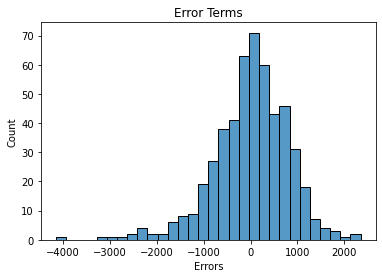

In [230]:
#Plot the histogram of the error terms
sns.histplot(y_train - y_train_pred)
plt.title('Error Terms') 
plt.xlabel('Errors')

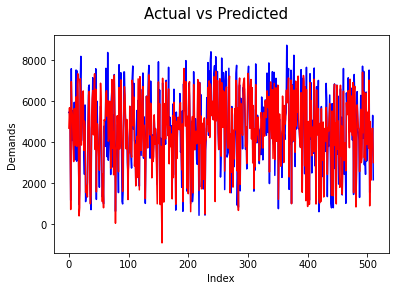

In [231]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(pd.DataFrame(c).to_numpy(),pd.DataFrame(y_train).to_numpy(), color="blue")
plt.plot(pd.DataFrame(c).to_numpy(),pd.DataFrame(y_train_pred).to_numpy(), color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

### Making Predictions

In [232]:
#Print R-squared Value fot train dataset
r2_score(y_train,y_train_pred)

0.8263735371411968

In [233]:
#Applying scaling on the test dataset
num_vars = ['temp','atemp','hum','windspeed']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [234]:
X_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,mnth_aug,mnth_dec,mnth_feb,...,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty,season_spring,season_summer,season_winter
468,1,0,0,0.543115,0.536771,0.518248,0.422104,0,0,0,...,0,0,0,0,0,0,0,0,1,0
148,0,0,0,0.758058,0.704203,0.843709,0.479765,0,0,0,...,0,0,0,1,0,0,0,0,1,0
302,0,0,0,0.324018,0.317998,0.642765,0.386287,0,0,0,...,0,0,0,1,0,0,0,0,0,1
355,0,0,1,0.453814,0.455552,0.780592,0.062325,0,1,0,...,1,0,0,0,0,0,1,1,0,0
515,1,0,1,0.773634,0.724915,0.507943,0.433030,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [235]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_6 = sm.add_constant(X_test)

In [236]:
y_pred = lr_6.predict(X_test_lm_6)

### Evaluating the Model

In [237]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8133

Text(0, 0.5, 'y_pred')

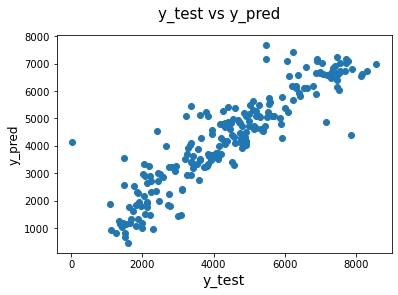

In [238]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 15)             
plt.xlabel('y_test', fontsize = 14)                          
plt.ylabel('y_pred', fontsize = 12) 

In [239]:
round(lr_6.params,4)

const                        2422.1149
yr                           2013.9703
atemp                        3762.5807
windspeed                    -738.4601
mnth_dec                     -650.1532
mnth_july                    -546.4287
mnth_nov                     -749.8252
weathersit_Light_snowrain   -2140.8621
weathersit_Misty             -671.2274
season_spring               -1308.1689
season_winter                 689.7179
dtype: float64

In [240]:
#Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.8043


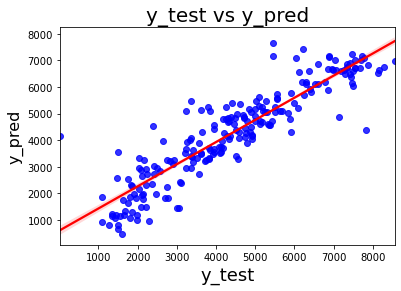

In [241]:
#Visualizing the fit on the test data
#plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

### Conclusion

#### Comparision between Training and Testing dataset:

    - Train dataset R^2          : 0.826
    - Test dataset R^2           : 0.813
    - Train dataset Adjusted R^2 : 0.823    
    - Test dataset Adjusted R^2  : 0.804

#### Demand of bikes depend on year, atemp, windspeed, months(July, November, December), weathersit(Light_snowrain, Misty), season(spring, winter).